# Descripción del proyecto 

Prepara un prototipo de un modelo de machine learning para Zyfra. La empresa desarrolla soluciones de eficiencia para la industria pesada.

El modelo debe predecir la cantidad de oro extraído del mineral de oro. Dispones de los datos de extracción y purificación.

El modelo ayudará a optimizar la producción y a eliminar los parámetros no rentables.

Tendrás que:

1. Preparar los datos.
2. Realizar el análisis de datos.
3. Desarrollar un modelo y entrenarlo.

# Inicialización 

In [1]:
#importemos las librerías que vamos a necesitar 
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Carga de datos 

In [2]:
gold_test = pd.read_csv('./gold_recovery_test.csv')
gold_train = pd.read_csv('./gold_recovery_train.csv')
gold_complete = pd.read_csv('./gold_recovery_full.csv')

# Revisión de datos 

#### Comencemos con el data set que tiene todos los datos

In [3]:
gold_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


Podemos ver que hay 87 columnas, 86 son del tipo object y 1 del tipo object. vemos valores faltantes en varias columnas. 

In [4]:
gold_complete.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


In [5]:
gold_complete.isna().sum()

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

Podemos ver las columnas en donde hay valores faltantes aún no sabemos como lidiaremos con ellos 

In [6]:
gold_complete.duplicated().sum()

np.int64(0)

No hay valores duplicados totales 

In [7]:
gold_complete.value_counts()

date                 final.output.concentrate_ag  final.output.concentrate_pb  final.output.concentrate_sol  final.output.concentrate_au  final.output.recovery  final.output.tail_ag  final.output.tail_pb  final.output.tail_sol  final.output.tail_au  primary_cleaner.input.sulfate  primary_cleaner.input.depressant  primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  primary_cleaner.output.concentrate_ag  primary_cleaner.output.concentrate_pb  primary_cleaner.output.concentrate_sol  primary_cleaner.output.concentrate_au  primary_cleaner.output.tail_ag  primary_cleaner.output.tail_pb  primary_cleaner.output.tail_sol  primary_cleaner.output.tail_au  primary_cleaner.state.floatbank8_a_air  primary_cleaner.state.floatbank8_a_level  primary_cleaner.state.floatbank8_b_air  primary_cleaner.state.floatbank8_b_level  primary_cleaner.state.floatbank8_c_air  primary_cleaner.state.floatbank8_c_level  primary_cleaner.state.floatbank8_d_air  primary_cleaner.state.floatbank8_d_level  roughe

In [8]:
gold_complete.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


#### Revisemos el dataset de prueba 

In [9]:
gold_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [10]:
gold_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


In [11]:
gold_test.isna().sum()

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


Veamos por último el dataset de entrenamiento

In [12]:
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [13]:
gold_train.isna().sum()

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

In [14]:
gold_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [15]:
gold_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Los datasets contienen una cantidad significativa de columnas, muchas de las cuales tienen valores nulos. Vamos a decidir que hacer con ellos más adelante 

# Cálculo de recuperación 

In [16]:
#Analiza las características no disponibles en el conjunto de prueba
#Creamos una lista con las columnas faltantes en el dataset de prueba y las mostramos
columns_missing = list(set(gold_complete).difference(gold_test))
columns_missing.append('date')
print(f'hay {len(columns_missing)} columnas faltantes')
print()
print(pd.Series(columns_missing))

hay 35 columnas faltantes

0                      secondary_cleaner.output.tail_ag
1                        primary_cleaner.output.tail_pb
2                                rougher.output.tail_pb
3         rougher.calculation.sulfate_to_au_concentrate
4     rougher.calculation.floatbank10_sulfate_to_au_...
5                     secondary_cleaner.output.tail_sol
6                                rougher.output.tail_ag
7                                  final.output.tail_pb
8                         rougher.output.concentrate_ag
9                        primary_cleaner.output.tail_au
10                      primary_cleaner.output.tail_sol
11                       rougher.output.concentrate_sol
12                                final.output.recovery
13                      rougher.calculation.au_pb_ratio
14                     secondary_cleaner.output.tail_pb
15                primary_cleaner.output.concentrate_ag
16                       primary_cleaner.output.tail_ag
17                   

In [ ]:
#llenemos las columnas faltantes de nuestro data set de prueba que vamos a necesitar más adelante 
test_merged = pd.merge(gold_test,gold_complete[columns_missing], on='date', how='left')

In [ ]:
#Rellenamos los datos faltantes del dt de entrenamiento 
gold_train.fillna(0,inplace=True)

In [ ]:
#Creamos nuestra función para calcular la recuperación
def calcular_recuperacion (train):
    valores = []
    for C, F, T in zip(
        train['rougher.output.concentrate_au'],
        train['rougher.input.feed_au'],
        train['rougher.output.tail_au']
    ):
      if F * (C - T) != 0: #Evitamos una division cero
         recuperacion = ( C * (F - T) / (F * (C - T) )) * 100 # Aplicamos la formula
         valores.append(recuperacion)
      else:
         valores.append(None) # Sihay una division por cero, que se guarde como Nulo

    return valores # transformamos a series

#Calculemos la recuperación para el dt de entrenamiento y guardemos los resultados en una nueva columna 
gold_train['rougher.output.recovery_cal'] = calcular_recuperacion (gold_train) # Creamos una nueva columna para una mejor visualizacion y comparación

In [20]:
#validemos
gold_train['rougher.output.recovery_cal']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: rougher.output.recovery_cal, Length: 16860, dtype: float64

In [ ]:
#Rellenemos los valores faltantes 
gold_train['rougher.output.recovery_cal'].fillna(0,inplace=True)

In [22]:
# MAE entre los valores calculados y los proporcionados en el dataset
mae_recovery = mean_absolute_error(gold_train["rougher.output.recovery"], gold_train['rougher.output.recovery_cal'])

mae_recovery

54.74947621845331

Encontramos que el MAE es de 54.74 lo cual nos indica que existen diferencias en los valores entre nuestro valor que calculamos y el que ya estaba precalculado. 

In [ ]:
#Ahora nuestro función para calcular la recuperación de los finales 
def calcular_recuperacion_full(train):
    valores = []
    for C, F, T in zip(
        train["primary_cleaner.output.concentrate_au"],
        train["rougher.output.concentrate_au"],
        train["secondary_cleaner.output.tail_au"]
    ):
      if F * (C - T) != 0: #Evitamos una division cero
         recuperacion = ( C * (F - T) / (F * (C - T) )) * 100 # Aplicamos la formula
         valores.append(recuperacion)
      else:
         valores.append(None) # Sihay una division por cero, que se guarde como Nulo

    return valores # transformamos a series
 
gold_train['final.output.recovery_cal'] = calcular_recuperacion_full (gold_train) # Creamos una nueva columna para una mejor visualizacion y comparación

In [24]:
gold_train['final.output.recovery_cal'].fillna(0,inplace=True)

/var/folders/5p/2k4j0bp9765brxsy2bdmtt6w0000gn/T/ipykernel_75085/2031547667.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gold_train['final.output.recovery_cal'].fillna(0,inplace=True)


In [25]:
# MAE entre los valores calculados y los proporcionados en el dataset
mae_recovery_full = mean_absolute_error(gold_train["final.output.recovery"], gold_train['final.output.recovery_cal'])

mae_recovery_full


299.4662461458506

Encontré que el MAE tiene un valor de 299.46 lo cual nos indica que existe una diferencia significativa entre los valores que calculamos y los que ya estaban calculado en el dataset original. 

In [27]:
#Vamos a dejar solo los valores que acabamos de recalcular y eliminemos los anteriores 
gold_train.drop(columns=(['final.output.recovery','rougher.output.recovery']), axis=1, inplace=True)

In [ ]:
#Guardemos una lista de las columnas del dt de entrenamiento y su orden que vamos a necesitar despues para ordenar el dataset de test
columns_train_ord = list(gold_train)

## Hagamos lo mismo pero para el dataset de prueba 

In [ ]:
#Rellenamos faltantes 
test_merged.fillna(0, inplace=True)

In [30]:
#Calculemos la recuperación para rougher
test_merged['rougher.output.recovery_cal'] = calcular_recuperacion (test_merged) # Creamos una nueva columna para una mejor visualizacion y comparación

In [31]:
#Calculemos la recuperación para final
test_merged['final.output.recovery_cal'] = calcular_recuperacion_full (test_merged) # Creamos una nueva columna para una mejor visualizacion y comparación

In [32]:
test_merged['rougher.output.recovery_cal'].fillna(0,inplace=True)
test_merged['final.output.recovery_cal'].fillna(0,inplace=True)

/var/folders/5p/2k4j0bp9765brxsy2bdmtt6w0000gn/T/ipykernel_75085/1579050444.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_merged['rougher.output.recovery_cal'].fillna(0,inplace=True)
/var/folders/5p/2k4j0bp9765brxsy2bdmtt6w0000gn/T/ipykernel_75085/1579050444.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

In [33]:
#Calculemos el MAE para Rougher
mae_test_recovery = mean_absolute_error(test_merged["rougher.output.recovery"], test_merged['rougher.output.recovery_cal'])

mae_test_recovery

3.499321557794745

In [34]:
#Calculemos el MAE para Final
mae_test_recovery_full = mean_absolute_error(test_merged["final.output.recovery"], test_merged['final.output.recovery_cal'])

mae_test_recovery_full

24.88122903712998

In [ ]:
#Eliminemos las columnas que no nos sirven
test_merged.drop(columns=(['final.output.recovery','rougher.output.recovery']), axis=1, inplace=True)

In [36]:
print(columns_train_ord)

['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_b_level', 'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_c_level', 'primary_cleaner.state.floatbank8_d_air', 'primary_cleaner.state.floatb

In [38]:
#Ahora que ya tenemso nuestro dt de prueba completo ordenemos de acuerdo a las columnas de entrenamiento 
test_merged = test_merged.loc[:,['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_b_level', 'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_c_level', 'primary_cleaner.state.floatbank8_d_air', 'primary_cleaner.state.floatbank8_d_level', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate', 'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.output.tail_ag', 'rougher.output.tail_pb', 'rougher.output.tail_sol', 'rougher.output.tail_au', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level', 'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_sol', 'secondary_cleaner.output.tail_au', 'secondary_cleaner.state.floatbank2_a_air', 'secondary_cleaner.state.floatbank2_a_level', 'secondary_cleaner.state.floatbank2_b_air', 'secondary_cleaner.state.floatbank2_b_level', 'secondary_cleaner.state.floatbank3_a_air', 'secondary_cleaner.state.floatbank3_a_level', 'secondary_cleaner.state.floatbank3_b_air', 'secondary_cleaner.state.floatbank3_b_level', 'secondary_cleaner.state.floatbank4_a_air', 'secondary_cleaner.state.floatbank4_a_level', 'secondary_cleaner.state.floatbank4_b_air', 'secondary_cleaner.state.floatbank4_b_level', 'secondary_cleaner.state.floatbank5_a_air', 'secondary_cleaner.state.floatbank5_a_level', 'secondary_cleaner.state.floatbank5_b_air', 'secondary_cleaner.state.floatbank5_b_level', 'secondary_cleaner.state.floatbank6_a_air', 'secondary_cleaner.state.floatbank6_a_level', 'rougher.output.recovery_cal', 'final.output.recovery_cal']]

# Preprocesamiento de datos

In [39]:
#Vamos a rellenar los valores faltantes, usamos el metodod ffill
gold_complete.fillna(method='ffill', inplace=True)
test_merged.fillna(method='ffill', inplace=True)
gold_train.fillna(method='ffill', inplace=True)

#Eliminemos duplicados
gold_complete.drop_duplicates()
test_merged.drop_duplicates()
gold_train.drop_duplicates()



/var/folders/5p/2k4j0bp9765brxsy2bdmtt6w0000gn/T/ipykernel_75085/658458661.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gold_complete.fillna(method='ffill', inplace=True)
/var/folders/5p/2k4j0bp9765brxsy2bdmtt6w0000gn/T/ipykernel_75085/658458661.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_merged.fillna(method='ffill', inplace=True)
/var/folders/5p/2k4j0bp9765brxsy2bdmtt6w0000gn/T/ipykernel_75085/658458661.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gold_train.fillna(method='ffill', inplace=True)


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery_cal,final.output.recovery_cal
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,10.411962,0.895447,16.904297,2.143149,127.092003,...,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763,94.002047
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,10.462676,0.927452,16.634514,2.224930,125.629232,...,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261,94.480831
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,10.507046,0.953716,16.208849,2.257889,123.819808,...,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308,94.374788
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,10.422762,0.883763,16.532835,2.146849,122.270188,...,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430,95.857764
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,10.360302,0.792826,16.525686,2.055292,117.988169,...,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794,94.539701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,8.769645,3.141541,10.403181,1.529220,123.381787,...,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428,89.574376,100.000000
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,8.897321,3.130493,10.549470,1.612542,120.878188,...,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608,87.724007,100.000000
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,8.529606,2.911418,11.115147,1.596616,105.666118,...,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452,88.890579,100.000000
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,8.777171,2.819214,10.463847,1.602879,98.880538,...,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471,89.858126,100.000000


## Observemos los cambios en las concentraciones de metales 

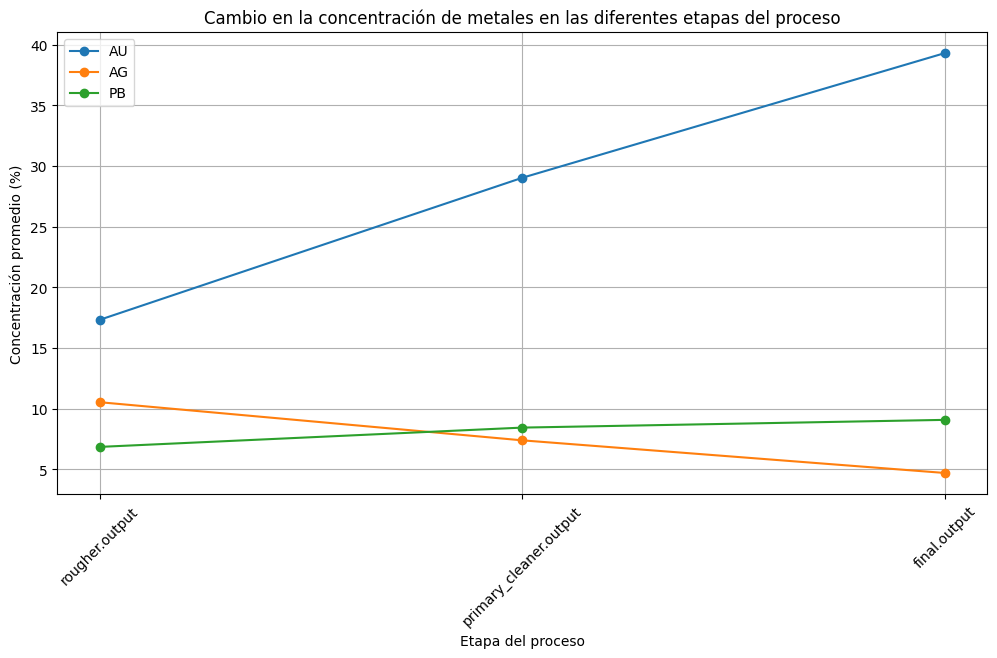

In [40]:
#vamos a crear nuestras listas con las etapas de conentrado y metales 
stages = ["rougher.output", "primary_cleaner.output", "final.output"]
metals = ["au", "ag", "pb"]

#Creamos gráficos de concentración de metales en cada etapa
plt.figure(figsize=(12, 6))

for metal in metals:
    concentrations = [gold_train[f"{stage}.concentrate_{metal}"].mean() for stage in stages]
    plt.plot(stages, concentrations, marker='o', label=f"{metal.upper()}")

plt.xlabel("Etapa del proceso")
plt.ylabel("Concentración promedio (%)")
plt.title("Cambio en la concentración de metales en las diferentes etapas del proceso")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


Podemos visualizar el proceso de purificación y como se va eliminando las impurezas y prevaleciendo la obtención del oro sobre los otros metales. 

## Comparemos las distribuciones del tamaño de las partículas de la alimentación en el conjunto de entrenamiento y prueba. 

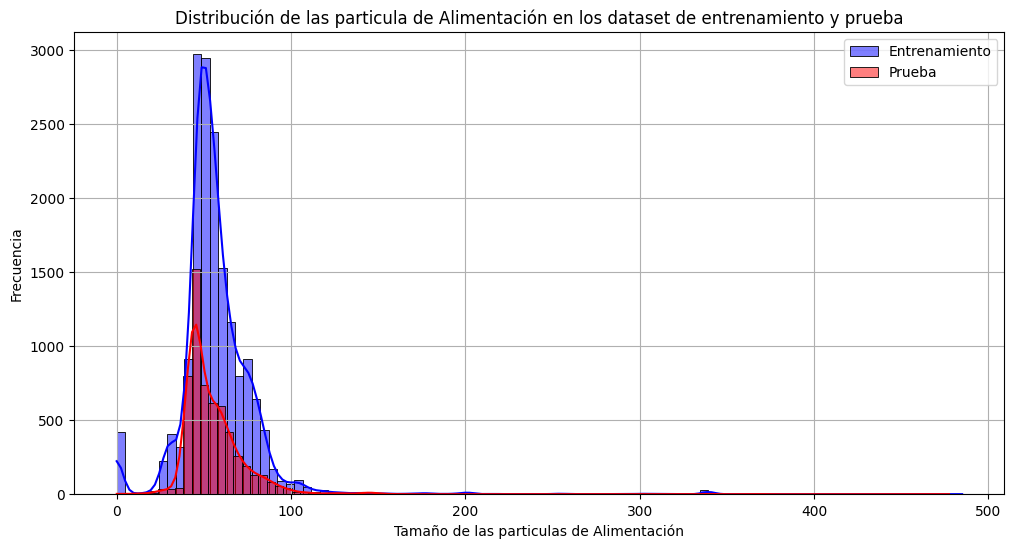

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(gold_train['rougher.input.feed_size'], bins=100 , kde=True , label = 'Entrenamiento',color='blue', alpha=0.5)
sns.histplot(gold_test['rougher.input.feed_size'], bins=100 , kde=True , label = 'Prueba', color='red', alpha = 0.5)

plt.xlabel('Tamaño de las particulas de Alimentación')
plt.ylabel('Frecuencia')
plt.title('Distribución de las particula de Alimentación en los dataset de entrenamiento y prueba')
plt.legend()
plt.grid()
plt.show()

## Visualicemos las concentraciones totales de las sustancias en las diferentes etapas

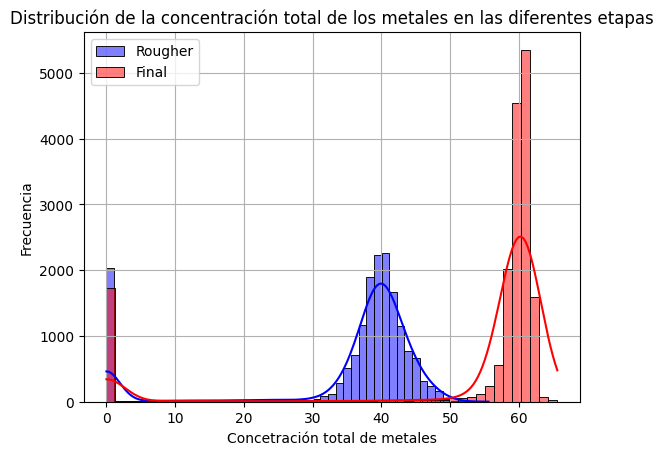

In [42]:
#Sumemos las concentraciones de cada metal para la etapa rougher
l1 = (gold_train['rougher.output.concentrate_au'] + gold_train['rougher.output.concentrate_ag'] + gold_train['rougher.output.concentrate_pb'])
#Sumemos las concentraciones de cada metal para la etapa final
l2 = (gold_train['final.output.concentrate_au'] + gold_train['final.output.concentrate_ag'] + gold_train['final.output.concentrate_pb'])

#Grafiquemos los totales 
plt.Figure(figsize=(12,6))
sns.histplot(l1, bins=50, kde=True , label= 'Rougher' , alpha=0.5 , color='blue')
sns.histplot(l2, bins=50, kde=True , label='Final' , alpha=0.5 , color='red')

plt.xlabel('Concetración total de metales')
plt.ylabel('Frecuencia')
plt.title('Distribución de la concentración total de los metales en las diferentes etapas')
plt.legend()
plt.grid()
plt.show()

Podemos visualizar que la concentración de metales aumenta al ir pasando por las diferentes etapas del proceso. 

# Construyamos  y probemos diferentes modelos 

Ya tenemos nuestro dataframe de prueba completo con las columnas que hacían falta. Ahora podemos proceder a preparar nuestros features y objetivos y crear nuestros modelos. 

In [43]:
#Creamos nuestros objetivos y características para entrenamiento y validación 
gold_train_features = gold_train.drop(columns=['rougher.output.recovery_cal','final.output.recovery_cal','date'], axis=1)
gold_train_target = gold_train[['rougher.output.recovery_cal','final.output.recovery_cal']]

gold_valid_features = test_merged.drop(columns=['rougher.output.recovery_cal','final.output.recovery_cal','date'], axis=1)
gold_valid_target = test_merged[['rougher.output.recovery_cal','final.output.recovery_cal']]


In [44]:
#Antes de entrenar modelos , estandaricemos los datos, vamos a usar standarscaler 
scaler = StandardScaler()
gold_train_features_scaled = scaler.fit_transform(gold_train_features)
gold_valid_features_scaled = scaler.fit_transform(gold_valid_features)

In [45]:
#Validemos 
gold_train_features_scaled

array([[ 0.64248482,  0.2373375 , -0.65716307, ..., -0.04487397,
        -0.58799387, -1.01504941],
       [ 0.63017355,  0.26042908, -0.71995546, ..., -0.04612116,
        -0.60959062, -0.94413838],
       [ 0.64273229,  0.33178989, -0.68825582, ..., -0.04539661,
        -0.60531182, -0.96334742],
       ...,
       [-0.75036376,  0.68717258, -0.31024387, ..., -0.03863087,
         0.23634835,  0.20674042],
       [-0.62871623,  0.74285786, -0.3320301 , ..., -0.03932493,
         0.23960937,  0.21719861],
       [-0.51941564,  0.77554444, -0.3526444 , ..., -0.04049961,
         0.23627077,  0.23399175]], shape=(16860, 84))

# Vamos a Crear nuestro primer modelo (Regresíon lineal)

In [46]:
#Creamos entrenamos y predecimos con nuestro modelo 
rl_model = LinearRegression()
rl_model.fit(gold_train_features_scaled, gold_train_target)
rl_pred_train = rl_model.predict(gold_train_features_scaled)
rl_predict = rl_model.predict(gold_valid_features_scaled)

#Calculemos las metricas para evaluar nuestro modelo 
rl_R2_train = rl_model.score(gold_train_features_scaled, gold_train_target)
rl_R2_val = r2_score(gold_valid_target,rl_predict)

#Imprimamos los resultados 
print("Valor R2 en un conjunto de entrenamiento",rl_R2_train )
print("Valor R2 en un conjunto de validación:", rl_R2_val)

Valor R2 en un conjunto de entrenamiento 0.06255668401829495
Valor R2 en un conjunto de validación: -714.7614152259939


In [47]:
# Probemos nuestro modelos con una validación cruzada 
rl_v_model_score = cross_val_score(rl_model, gold_train_features_scaled, gold_train_target, cv=5)
print("Cross Validation Scores: ", rl_v_model_score)
print("Puntuación media de la evaluación del modelo: ", rl_v_model_score.mean())
print("Número de CV Scores usados en promedio: ", len(rl_v_model_score))

Cross Validation Scores:  [-7.62458408e+02 -2.50932655e+02 -1.80223862e+02 -2.66154192e-02
 -1.02374801e-02]
Puntuación media de la evaluación del modelo:  -238.73035558006754
Número de CV Scores usados en promedio:  5


SMAPE PARA EL MODELO DE REGRESIÓN LINEAL 

In [48]:
#hagamos una función para el calculo del smape para este y todos los modelos 
def smape_fon(true, pred): 
    len_true = len(true)
    real = abs(true)
    pred = abs(pred)
    dif = abs(true-pred)
    
    smape = (1/len_true)*np.sum(dif/((real+pred)/2))*100
    return smape

def smape_ind(true, pred):
    true_rough = true['rougher.output.recovery_cal']
    true_pred_rough = pred[:,0]
    true_final = true['final.output.recovery_cal']
    true_pred_final = pred[:,1]
    
    smape_rough = smape_fon(true_rough, true_pred_rough)
    smape_final = smape_fon(true_final, true_pred_final) 
    smape_score = (0.25*smape_rough + 0.75*smape_final)
    
    return smape_rough, smape_final, smape_score

In [49]:

linear_smape_rough, linear_smape_final, linear_smape_score_total = smape_ind( gold_valid_target , rl_predict)

print('smape para rougher:', linear_smape_rough)
print('smape para final.output;',linear_smape_final )
print('Score sMAPE Final:', linear_smape_score_total)

smape para rougher: 109.55240447658632
smape para final.output; 145.0142815069664
Score sMAPE Final: 136.14881224937136


Podemos observar que la métricas que nos arroja el modelo no son buenas y despues de realizar una validación cruzada vemos que el modelo tiene problemas.  

# Modelo de Arbol de decisión de regresión 

In [50]:
best_depth = 0
best_result = 1000

for depth in range(1,100):
    ar_model = DecisionTreeRegressor(random_state=345, max_depth=depth)
    ar_model.fit(gold_train_features, gold_train_target)
    ar_model_predict = ar_model.predict(gold_valid_features)
    result = mean_absolute_error(gold_valid_target, ar_model_predict)**0.5
    if result < best_result:
        best_result = result
        best_depth = depth

print(f"RMSE del mejor modelo en el conjunto de validación (max_depth = {best_depth}): {best_result}")

RMSE del mejor modelo en el conjunto de validación (max_depth = 21): 8.143589776935087


In [61]:
t_model = DecisionTreeRegressor(random_state=345, max_depth=best_depth)
t_model.fit(gold_train_features, gold_train_target)
t_model_predict = t_model.predict(gold_valid_features)
p3 = mean_absolute_error(gold_valid_target, t_model_predict)**0.5

print(f"RMSE del mejor modelo en el conjunto de validación:",p3 )

RMSE del mejor modelo en el conjunto de validación: 8.143589776935087


In [52]:
t_model_v_score = cross_val_score(t_model, gold_train_features, gold_train_target, cv=5)
print("Cross Validation Scores: ", t_model_v_score )
print("Puntuación media de la evaluación del modelo: ", t_model_v_score .mean())
print("Número de CV Scores usados en promedio: ", len(t_model_v_score ))

Cross Validation Scores:  [-8.35229673e+01 -3.74912186e+00 -5.17839817e+00  1.03096481e-02
 -3.18985395e+01]
Puntuación media de la evaluación del modelo:  -24.867743439469038
Número de CV Scores usados en promedio:  5


In [57]:
tree_smape_rough, tree_smape_final, tree_smape_score_total = smape_ind( gold_valid_target , t_model_predict)

print('smape para rougher:', tree_smape_rough)
print('smape para final.output;',tree_smape_final )
print('Score sMAPE Final:', tree_smape_score_total)

smape para rougher: 43.495985913832875
smape para final.output; 23.691954697163727
Score sMAPE Final: 28.642962501331013


# Modelo de Bosque aleatorio de regresión 

In [54]:
bst_err = 1000
bst_est = 0
bst_depth = 0 

for e in range(1,12):
    for d in range(1,12):
        for_model = RandomForestRegressor(random_state=123, max_depth=d, n_estimators=e)
        for_model.fit(gold_train_features,gold_train_target)
        for_predict = for_model.predict(gold_valid_features)
        for_result = mean_absolute_error(gold_valid_target, for_predict)**0.5
        if for_result < bst_err:
            bst_err = for_result
            bst_est = e
            bst_depth = d
        
print(f"RMSE del mejor modelo en el conjunto de validación (max_depth = {bst_depth}): {bst_err}")

RMSE del mejor modelo en el conjunto de validación (max_depth = 7): 9.12028329640872


In [55]:
b_model = RandomForestRegressor(random_state=123, max_depth=bst_depth , n_estimators=bst_est)
b_model.fit(gold_train_features, gold_train_target)
b_model_predict = b_model.predict(gold_valid_features)
b_error = mean_absolute_error(gold_valid_target, b_model_predict)**0.5

print(f"RMSE del mejor modelo en el conjunto de validación:",b_error )

RMSE del mejor modelo en el conjunto de validación: 9.12028329640872


In [56]:
b_model_v_score = cross_val_score(b_model, gold_train_features, gold_train_target, cv=5)
print("Cross Validation Scores: ", b_model_v_score )
print("Puntuación media de la evaluación del modelo: ", b_model_v_score .mean())
print("Número de CV Scores usados en promedio: ", len(b_model_v_score ))

Cross Validation Scores:  [-7.12807626e+02 -1.39422134e+04 -2.60906234e+03 -6.07222897e-01
 -7.04414288e-01]
Puntuación media de la evaluación del modelo:  -3453.0790023529953
Número de CV Scores usados en promedio:  5


In [58]:
bosq_smape_rough, bosq_smape_final, bosq_smape_score_total = smape_ind( gold_valid_target , b_model_predict)

print('smape para rougher:', bosq_smape_rough)
print('smape para final.output;',bosq_smape_final )
print('Score sMAPE Final:', bosq_smape_score_total)

smape para rougher: 22.739778350091772
smape para final.output; 24.487076285257757
Score sMAPE Final: 24.05025180146626


# Conclusiones 

Para este proyecto tuvimos que realizar interpretación de datos y correcciones. Despues de analizar la información y probar nuestros diversos modelos observamos varias cosas. 

La primera es que el proceso de filtrado funciona y funciona bien. Vemos como la concetración de otros metales va disminuyendo y prevalece el oro...lo cual es lo que buscamos. 

En segundo encontramos que al recalcular la recuperación encontramos que no están bien calculadas y decidimos mantener nuestros nuevos calculos. 

En tercero creamos 3 modelos de regresión linear, arbol de regresión y bosque de regresión, los cuales entrenamos, probamos, realizamos validación cruzada por último calculamos el sMAPE.  

Con base en el sMAPE final que es nuestra métrica de evalución de los modelos, determinamos que el mejor modelo es el bosque aleatorio de regresión con un smape de 24.05 % 